In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2020-10-17 14:16:57,808] INFO in core: Started 


2020-09-11


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Robinhood,21.0,0.449646,0.940234,-0.745745,-0.727122,0.217423,2.234797,2.389501,0.469719,12.808783,9.942591,0.868188
CSI 300,21.0,0.215675,0.496563,-0.813151,-0.618983,0.383723,0.775237,0.825426,0.418226,6.711609,4.189084,-0.829893
S&P 500,21.0,0.181189,0.514813,-0.893379,-0.668729,0.306497,0.818780,0.884364,0.336412,4.376523,4.773636,-0.611911
IRA,21.0,0.134816,0.417981,-0.588149,-0.463969,0.129008,0.715623,0.891353,0.303401,3.006852,3.644156,0.021710
M1,21.0,0.097100,0.302327,-0.532137,-0.388828,0.123499,0.485870,0.589815,0.294714,2.348375,3.022040,-0.557038


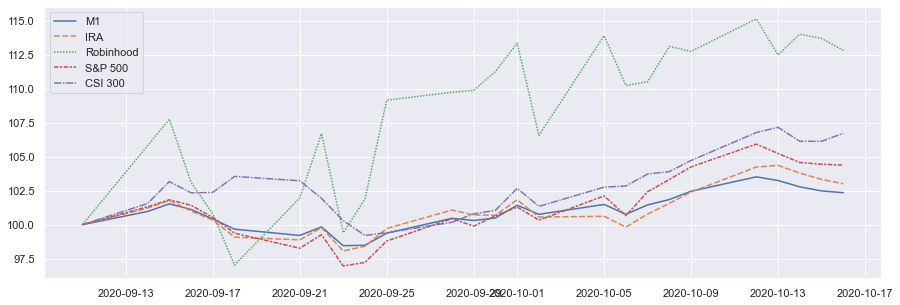

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
    rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2020-03-20 84


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
M1,126.0,0.114121,0.116697,-0.213383,-0.125922,0.119515,0.292446,0.516326,0.909374,25.633181,6.475276,-0.006789
S&P 500,126.0,0.209908,0.224410,-0.319286,-0.183527,0.236060,0.568884,1.014842,0.899729,53.065819,9.440448,0.250342
CSI 300,126.0,0.232264,0.285584,-0.190140,-0.117558,0.174630,0.888813,1.085223,0.785282,47.707912,6.510852,1.247915
IRA,126.0,0.210714,0.279502,-0.351423,-0.144037,0.193919,0.733987,1.477699,0.725269,69.928611,9.203500,1.609772


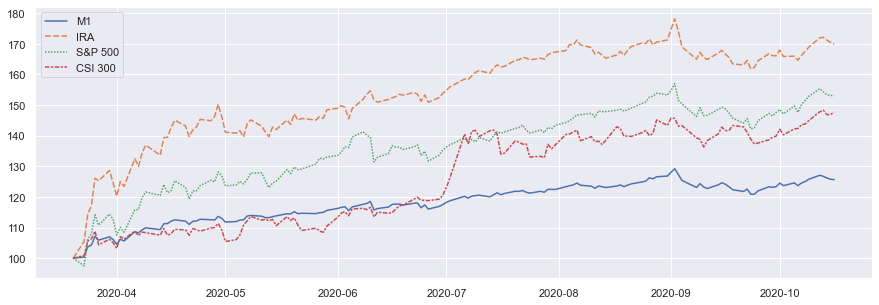

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 21)})
    rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 126 + 21)})
print(m1.index[0], len(rh))
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    # 'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 21)

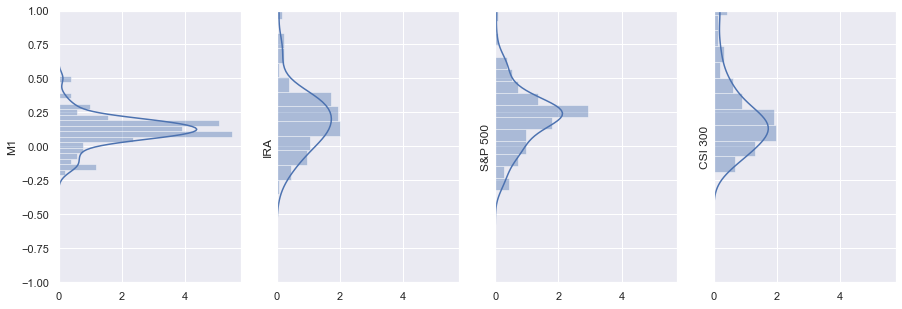

In [4]:
ret = frame.rolling(21).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-1, +1])